In [1]:
import pandas as pd

In [2]:
from matplotlib import rc

rc('font', family='Malgun Gothic')

# 데이터 불러오기

In [3]:
chunk_size = 1000000
nrows = None
subset_size = 100000000

file_path = "카드소비데이터 201901_06.txt"

current_rows_2019 = 0
full_2019 = pd.DataFrame()

for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size, sep=',', encoding='cp949')):
    full_2019 = pd.concat([full_2019, chunk], ignore_index=True)
    current_rows_2019 += len(chunk)
    
    if current_rows_2019 >= subset_size:
        full_2019 = full_2019.iloc[subset_size:]
        current_rows_2019 -= subset_size

current_rows_2019

25541691

In [4]:
full_2019.head()

,월별,가맹점집계구번호,업종명,성별,연령대,요일,시간대별,이용금액,이용건수
0,201901,1101053020002,편의점,여성,50대,일,저녁(18-20),28500,10
1,201901,1101060020001,서양음식,여성,30대,일,오후(14-17),331150,27
2,201901,1101053020003,서양음식,여성,30대,화,오후(14-17),584130,78
3,201901,1101053020003,서양음식,남성,30대,토,오후(14-17),913100,101
4,201901,1101053020003,일식회집,남성,40대,금,점심(11-13),272500,11


In [5]:
full_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25541691 entries, 0 to 25541690
Data columns (total 9 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   월별        int64 
 1   가맹점집계구번호  int64 
 2   업종명       object
 3   성별        object
 4   연령대       object
 5   요일        object
 6   시간대별      object
 7   이용금액      int64 
 8   이용건수      int64 
dtypes: int64(4), object(5)
memory usage: 1.7+ GB


In [6]:
print("총 가맹점 수 :", len(full_2019['가맹점집계구번호'].unique()))
print("총 업종 수 :", len(full_2019['업종명'].unique()))
print("총 연령대 수 :", len(full_2019['연령대'].unique()))

총 가맹점 수 : 6462
총 업종 수 : 200
총 연령대 수 : 6


In [7]:
chunk_size = 1000000
nrows = None
subset_size = 100000000

file_path = "카드소비데이터 202001_06.txt"

current_rows_2020 = 0
full_2020 = pd.DataFrame()

for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size, sep=',', encoding='cp949')):
    full_2020 = pd.concat([full_2020, chunk], ignore_index=True)
    current_rows_2020 += len(chunk)
    
    if current_rows_2020 >= subset_size:
        full_2020 = full_2020.iloc[subset_size:]
        current_rows_2020 -= subset_size

current_rows_2020

24340024

In [8]:
full_2020.head()

,월별,가맹점집계구번호,업종명,성별,연령대,요일,시간대별,이용금액,이용건수
0,202001,1101053010004,서양음식,여성,50대,수,오후(14-17),514700,23
1,202001,1101053010004,스넥,남성,40대,목,저녁(18-20),99400,8
2,202001,1101053010004,서양음식,남성,40대,토,오후(14-17),367900,21
3,202001,1101053010004,일식회집,여성,20대,목,저녁(18-20),218500,10
4,202001,1101053020002,기타숙박업,남성,50대,일,저녁(18-20),230000,13


In [9]:
full_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24340024 entries, 0 to 24340023
Data columns (total 9 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   월별        int64 
 1   가맹점집계구번호  int64 
 2   업종명       object
 3   성별        object
 4   연령대       object
 5   요일        object
 6   시간대별      object
 7   이용금액      int64 
 8   이용건수      int64 
dtypes: int64(4), object(5)
memory usage: 1.6+ GB


In [10]:
print("총 가맹점 수 :", len(full_2020['가맹점집계구번호'].unique()))
print("총 업종 수 :", len(full_2020['업종명'].unique()))
print("총 연령대 수 :", len(full_2020['연령대'].unique()))

총 가맹점 수 : 6445
총 업종 수 : 202
총 연령대 수 : 6


In [11]:
print("2019년-> 2020년 건수 변동")
print("카드 사용 건수 변동 :", current_rows_2020 - current_rows_2019)
print("총 가맹점 수 변동 :", len(full_2020['가맹점집계구번호'].unique()) - len(full_2019['가맹점집계구번호'].unique()))
print("총 업종 수 변동 :", len(full_2020['업종명'].unique()) - len(full_2019['업종명'].unique()))

2019년-> 2020년 건수 변동
카드 사용 건수 변동 : -1201667
총 가맹점 수 변동 : -17
총 업종 수 변동 : 2


서울시 기준 BC카드를 사용하는 신규 업종이 등장, 그러나 가맹점 수와 카드 사용 건수는 감소

# 월별 소비 추이

In [12]:
Monthly_2019 = full_2019[['월별', '이용금액', '이용건수']].copy()
Monthly_2019 = Monthly_2019.groupby(['월별'], as_index=False).sum()
Monthly_2019

,월별,이용금액,이용건수
0,201901,3087767736516,88291233
1,201902,2671440226188,80001852
2,201903,2984840417379,92193573
3,201904,2974453761296,93237037
4,201905,3028186933327,97238487
5,201906,2834576531317,92946939


In [13]:
Monthly_2020 = full_2020[['월별', '이용금액', '이용건수']].copy()
Monthly_2020 = Monthly_2020.groupby(['월별'], as_index=False).sum()
Monthly_2020

,월별,이용금액,이용건수
0,202001,3189709371075,91562101
1,202002,2836371346082,84111989
2,202003,2884641541068,83338618
3,202004,2812191629547,83598344
4,202005,2945422612672,89943102
5,202006,2968568849076,92033530


In [14]:
Monthly_differ = pd.DataFrame()
Monthly_differ['월별'] = Monthly_2020['월별']
Monthly_differ['이용금액'] = Monthly_2020['이용금액'] - Monthly_2019['이용금액']
Monthly_differ['이용건수'] = Monthly_2020['이용건수'] - Monthly_2019['이용건수']
Monthly_differ['이용금액 증감(%)'] = (Monthly_differ['이용금액'] / Monthly_2019['이용금액']) * 100
Monthly_differ['이용건수 증감(%)'] = (Monthly_differ['이용건수'] / Monthly_2019['이용건수']) * 100
Monthly_differ

,월별,이용금액,이용건수,이용금액 증감(%),이용건수 증감(%)
0,202001,101941634559,3270868,3.301467,3.704635
1,202002,164931119894,4110137,6.173865,5.137552
2,202003,-100198876311,-8854955,-3.356926,-9.604742
3,202004,-162262131749,-9638693,-5.455191,-10.337837
4,202005,-82764320655,-7295385,-2.733131,-7.502569
5,202006,133992317759,-913409,4.727067,-0.982721


C:\Users\skt75\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


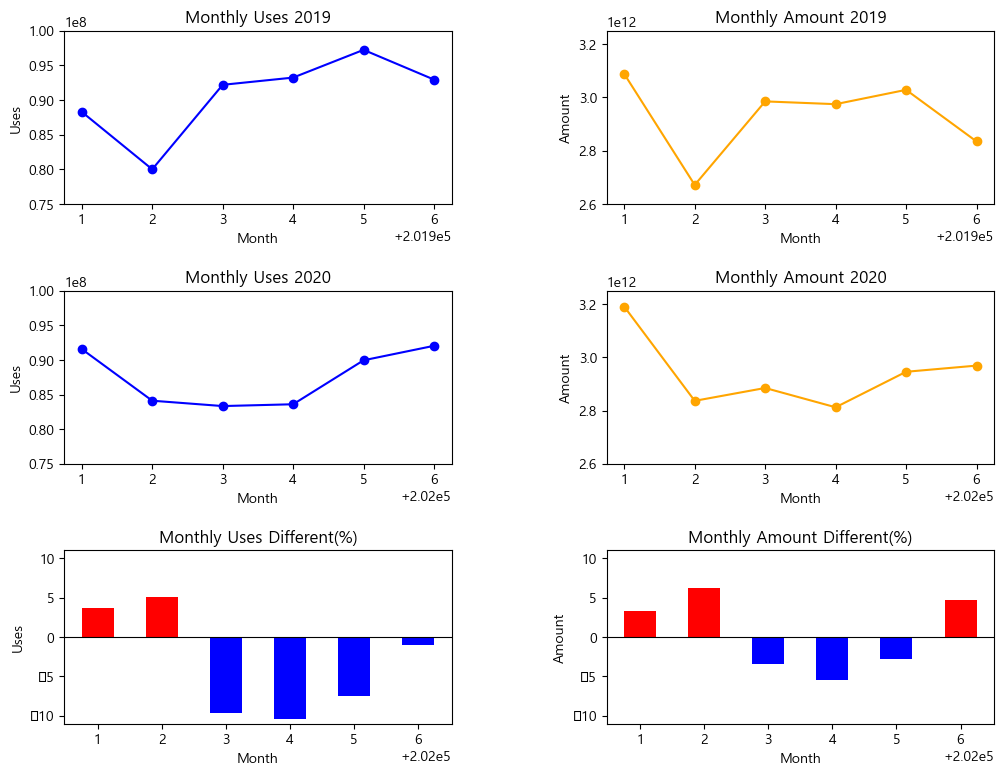

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 9), gridspec_kw={'wspace': 0.4})

# 1
axes[0, 0].plot(Monthly_2019['월별'], Monthly_2019['이용건수'], marker='o', label='Uses', color='blue')
axes[0, 0].set_title('Monthly Uses 2019')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Uses')
axes[0, 0].set_ylim(75000000, 100000000)

# 2
axes[1, 0].plot(Monthly_2020['월별'], Monthly_2020['이용건수'], marker='o', label='Uses', color='blue')
axes[1, 0].set_title('Monthly Uses 2020')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Uses')
axes[1, 0].set_ylim(75000000, 100000000)

# 3
axes[0, 1].plot(Monthly_2019['월별'], Monthly_2019['이용금액'], marker='o', label='Total Money', color='orange')
axes[0, 1].set_title('Monthly Amount 2019')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Amount')
axes[0, 1].set_ylim(2600000000000, 3250000000000)

# 4
axes[1, 1].plot(Monthly_2020['월별'], Monthly_2020['이용금액'], marker='o', label='Total Money', color='orange')
axes[1, 1].set_title('Monthly Amount 2020')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Amount')
axes[1, 1].set_ylim(2600000000000, 3250000000000)

# 증감 비교
# 5
axes[2, 0].bar(Monthly_differ['월별'], Monthly_differ['이용건수 증감(%)'], color=['blue' if value < 0 else 'red' for value in Monthly_differ['이용건수 증감(%)']], width=0.5)
axes[2, 0].set_title('Monthly Uses Different(%)')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Uses')
axes[2, 0].axhline(0, color='black', linewidth=0.8)
axes[2, 0].set_ylim(-11, 11)

# 6
axes[2, 1].bar(Monthly_differ['월별'], Monthly_differ['이용금액 증감(%)'], color=['blue' if value < 0 else 'red' for value in Monthly_differ['이용금액 증감(%)']], width=0.5)
axes[2, 1].set_title('Monthly Amount Different(%)')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Amount')
axes[2, 1].axhline(0, color='black', linewidth=0.8)
axes[2, 1].set_ylim(-11, 11)

fig.subplots_adjust(hspace=0.5)
plt.show()

2019년과 2020년을 비교할 때 2월 까지는 카드 사용건수와 사용금액이 증가했지만, 3~5월은 폭락한다.\
이용건수 기준으로 500만 건 이상이 감소, 금액기준으로 약 1000억원 이상이 감소했다.

6월은 예년과 비슷한 수준의 소비 건수(감소)가 있지만, 이용금액은 증가한 케이스다.\
3-5월의 소비 급감은 타격이 크다.특히 4월달은 예년과 비교하여 이용금액이 5%, 이용건수는 10%가 감소했다.\
마찬가지로 감소한 이용건수에 비해 이용금액의 감소 비율은 낮은 경향을 보인다.\
3-5월의 감소는 2020년 초반 COVID-19의 영향이 큰 것으로 판단된다.

# 2019년도 연령대별 선호 업종

In [16]:
full_2019['연령대'].unique()

array(['50대', '30대', '40대', '20대', '60대 이상', '20세 미만'], dtype=object)

In [17]:
Man_2019 = full_2019[full_2019['성별']=='남성'][['연령대', '업종명', '이용금액', '이용건수']].copy()
Man_2019_10 = Man_2019[Man_2019['연령대']=='20세 미만'].drop('연령대', axis=1)
Man_2019_20 = Man_2019[Man_2019['연령대']=='20대'].drop('연령대', axis=1)
Man_2019_30 = Man_2019[Man_2019['연령대']=='30대'].drop('연령대', axis=1)
Man_2019_40 = Man_2019[Man_2019['연령대']=='40대'].drop('연령대', axis=1)
Man_2019_50 = Man_2019[Man_2019['연령대']=='50대'].drop('연령대', axis=1)
Man_2019_60 = Man_2019[Man_2019['연령대']=='60대 이상'].drop('연령대', axis=1)

Woman_2019 = full_2019[full_2019['성별']=='여성'][['연령대', '업종명', '이용금액', '이용건수']].copy()
Woman_2019_10 = Woman_2019[Woman_2019['연령대']=='20세 미만'].drop('연령대', axis=1)
Woman_2019_20 = Woman_2019[Woman_2019['연령대']=='20대'].drop('연령대', axis=1)
Woman_2019_30 = Woman_2019[Woman_2019['연령대']=='30대'].drop('연령대', axis=1)
Woman_2019_40 = Woman_2019[Woman_2019['연령대']=='40대'].drop('연령대', axis=1)
Woman_2019_50 = Woman_2019[Woman_2019['연령대']=='50대'].drop('연령대', axis=1)
Woman_2019_60 = Woman_2019[Woman_2019['연령대']=='60대 이상'].drop('연령대', axis=1)

In [18]:
def dataframe_grouping(df):
    df = df.groupby('업종명', as_index=False).sum()
    df = df.sort_values('이용건수', ascending=False)
    return df.head(10)

In [19]:
Man_2019_10 = dataframe_grouping(Man_2019_10)
Man_2019_20 = dataframe_grouping(Man_2019_20)
Man_2019_30 = dataframe_grouping(Man_2019_30)
Man_2019_40 = dataframe_grouping(Man_2019_40)
Man_2019_50 = dataframe_grouping(Man_2019_50)
Man_2019_60 = dataframe_grouping(Man_2019_60)

Woman_2019_10 = dataframe_grouping(Woman_2019_10)
Woman_2019_20 = dataframe_grouping(Woman_2019_20)
Woman_2019_30 = dataframe_grouping(Woman_2019_30)
Woman_2019_40 = dataframe_grouping(Woman_2019_40)
Woman_2019_50 = dataframe_grouping(Woman_2019_50)
Woman_2019_60 = dataframe_grouping(Woman_2019_60)

예시

In [20]:
Man_2019_10

,업종명,이용금액,이용건수
102,인터넷PG,8883971717,679107
132,택시,2061421335,358141
137,편의점,836116430,276166
69,서양음식,1816915351,273858
107,일반한식,2196748124,207118
22,기타레져업,419857770,137599
101,인터넷Mall,636335496,99783
29,기타음료식품,198729163,95983
78,스넥,744930071,92012
103,인터넷종합Mall,1255521371,34734


# 2020년도 연령대별 선호 업종

In [21]:
Man_2020 = full_2020[full_2020['성별']=='남성'][['연령대', '업종명', '이용금액', '이용건수']].copy()
Man_2020_10 = Man_2020[Man_2020['연령대']=='20세 미만'].drop('연령대', axis=1)
Man_2020_20 = Man_2020[Man_2020['연령대']=='20대'].drop('연령대', axis=1)
Man_2020_30 = Man_2020[Man_2020['연령대']=='30대'].drop('연령대', axis=1)
Man_2020_40 = Man_2020[Man_2020['연령대']=='40대'].drop('연령대', axis=1)
Man_2020_50 = Man_2020[Man_2020['연령대']=='50대'].drop('연령대', axis=1)
Man_2020_60 = Man_2020[Man_2020['연령대']=='60대 이상'].drop('연령대', axis=1)

Woman_2020 = full_2020[full_2020['성별']=='여성'][['연령대', '업종명', '이용금액', '이용건수']].copy()
Woman_2020_10 = Woman_2020[Woman_2020['연령대']=='20세 미만'].drop('연령대', axis=1)
Woman_2020_20 = Woman_2020[Woman_2020['연령대']=='20대'].drop('연령대', axis=1)
Woman_2020_30 = Woman_2020[Woman_2020['연령대']=='30대'].drop('연령대', axis=1)
Woman_2020_40 = Woman_2020[Woman_2020['연령대']=='40대'].drop('연령대', axis=1)
Woman_2020_50 = Woman_2020[Woman_2020['연령대']=='50대'].drop('연령대', axis=1)
Woman_2020_60 = Woman_2020[Woman_2020['연령대']=='60대 이상'].drop('연령대', axis=1)

In [22]:
Man_2020_10 = dataframe_grouping(Man_2020_10)
Man_2020_20 = dataframe_grouping(Man_2020_20)
Man_2020_30 = dataframe_grouping(Man_2020_30)
Man_2020_40 = dataframe_grouping(Man_2020_40)
Man_2020_50 = dataframe_grouping(Man_2020_50)
Man_2020_60 = dataframe_grouping(Man_2020_60)

Woman_2020_10 = dataframe_grouping(Woman_2020_10)
Woman_2020_20 = dataframe_grouping(Woman_2020_20)
Woman_2020_30 = dataframe_grouping(Woman_2020_30)
Woman_2020_40 = dataframe_grouping(Woman_2020_40)
Woman_2020_50 = dataframe_grouping(Woman_2020_50)
Woman_2020_60 = dataframe_grouping(Woman_2020_60)

예시

In [23]:
Man_2020_10

,업종명,이용금액,이용건수
98,인터넷PG,11311559040,839581
64,서양음식,1578741532,239208
136,편의점,675120319,214602
131,택시,1254867605,204690
104,일반한식,1760620454,158511
20,기타레져업,348653091,113135
97,인터넷Mall,510460281,90189
73,스넥,585248951,67298
99,인터넷종합Mall,992806037,26695
26,기타음료식품,54675908,22558


2019년도 2020년도 선호도 비교

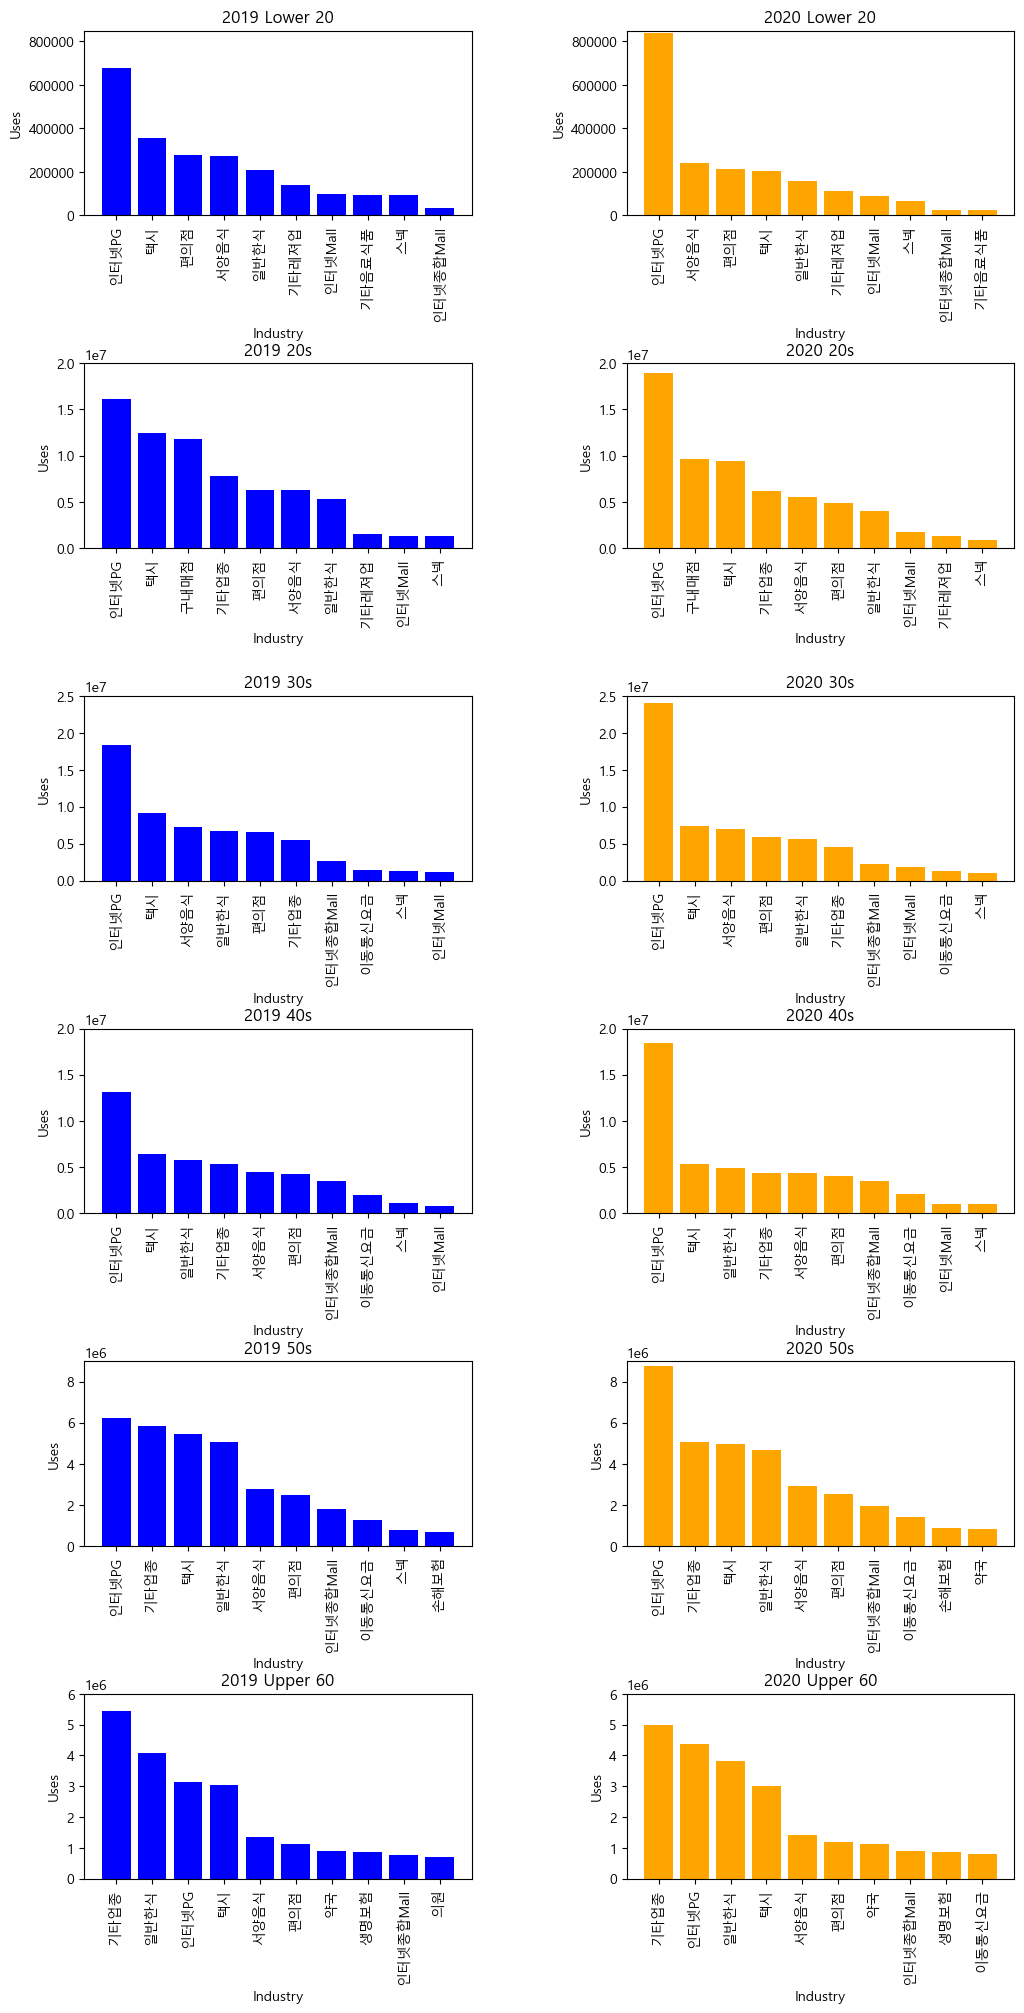

In [64]:
fig, axes = plt.subplots(6, 2, figsize=(12, 24), gridspec_kw={'wspace': 0.4})

# 10대
axes[0, 0].bar(Man_2019_10['업종명'], Man_2019_10['이용건수'], label='Uses', color='blue')
axes[0, 0].set_title('2019 Lower 20')
axes[0, 0].set_ylim(0, 850000)

# 10대
axes[0, 1].bar(Man_2020_10['업종명'], Man_2020_10['이용건수'], label='Uses', color='orange')
axes[0, 1].set_title('2020 Lower 20')
axes[0, 1].set_ylim(0, 850000)

# 20대
axes[1, 0].bar(Man_2019_20['업종명'], Man_2019_20['이용건수'], label='Uses', color='blue')
axes[1, 0].set_title('2019 20s')
axes[1, 0].set_ylim(0, 20000000)

axes[1, 1].bar(Man_2020_20['업종명'], Man_2020_20['이용건수'], label='Uses', color='orange')
axes[1, 1].set_title('2020 20s')
axes[1, 1].set_ylim(0, 20000000)

# 30대
axes[2, 0].bar(Man_2019_30['업종명'], Man_2019_30['이용건수'], label='Uses', color='blue')
axes[2, 0].set_title('2019 30s')
axes[2, 0].set_ylim(0, 25000000)

axes[2, 1].bar(Man_2020_30['업종명'], Man_2020_30['이용건수'], label='Uses', color='orange')
axes[2, 1].set_title('2020 30s')
axes[2, 1].set_ylim(0, 25000000)

# 40대
axes[3, 0].bar(Man_2019_40['업종명'], Man_2019_40['이용건수'], label='Uses', color='blue')
axes[3, 0].set_title('2019 40s')
axes[3, 0].set_ylim(0, 20000000)

axes[3, 1].bar(Man_2020_40['업종명'], Man_2020_40['이용건수'], label='Uses', color='orange')
axes[3, 1].set_title('2020 40s')
axes[3, 1].set_ylim(0, 20000000)

# 50대
axes[4, 0].bar(Man_2019_50['업종명'], Man_2019_50['이용건수'], label='Uses', color='blue')
axes[4, 0].set_title('2019 50s')
axes[4, 0].set_ylim(0, 9000000)

axes[4, 1].bar(Man_2020_50['업종명'], Man_2020_50['이용건수'], label='Uses', color='orange')
axes[4, 1].set_title('2020 50s')
axes[4, 1].set_ylim(0, 9000000)

# 60대
axes[5, 0].bar(Man_2019_60['업종명'], Man_2019_60['이용건수'], label='Uses', color='blue')
axes[5, 0].set_title('2019 Upper 60')
axes[5, 0].set_ylim(0, 6000000)

axes[5, 1].bar(Man_2020_60['업종명'], Man_2020_60['이용건수'], label='Uses', color='orange')
axes[5, 1].set_title('2020 Upper 60')
axes[5, 1].set_ylim(0, 6000000)

for i in range(6):
    for j in range(2):
        axes[i, j].set_xlabel('Industry')
        axes[i, j].set_ylabel('Uses')
        axes[i, j].set_xticks(axes[i, j].get_xticks())
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90)

fig.subplots_adjust(hspace=0.8)
plt.show()

20대와 60대 이상의 경우를 제외하더라도 2019년도 상반기의 소비 선호는 인터넷 쇼핑이 압도적인 주를 이루었다.\
그러나 2020년 COVID-19를 겪으면서 60대 이상을 제외한 모든 연령대에서 인터넷 쇼핑이 더욱 압도적인 소비처로 자리잡았으며,\
60대에서도 압도적이지는 않지만 가장 소비를 많이 하는 소비처로 떠올랐다.

추가적으로 인터넷 쇼핑을 제외, 주를 이루던 2019년도의 소비처들이 2020년도에 대부분 감소한 것으로 파악됐다.\
외출을 하지 않으면서 소비 선호의 변화가 생긴 것으로 판단된다.

# COVID-19에 따른 남녀 소비 차이

남성과 여성의 경우 이용금액과 이용건수 모두 비율적으로 큰 차이를 보이지 않는다.\
여성이 조금 더 낮지만 남성과 비슷한 소비를 하고 있음을 보인다.

In [25]:
Sex_2020 = full_2020[['성별', '이용금액', '이용건수']].copy()
Sex_2020 = Sex_2020.groupby(['성별'], as_index=False).sum()
Sex_2020

,성별,이용금액,이용건수
0,남성,9000240037184,269798151
1,여성,8636665312336,254789533


In [26]:
Sex_2019 = full_2019[['성별', '이용금액', '이용건수']].copy()
Sex_2019 = Sex_2019.groupby(['성별'], as_index=False).sum()
Sex_2019

,성별,이용금액,이용건수
0,남성,8893461847208,278094468
1,여성,8687803758815,265814653


2020년 상반기 vs 2019년 상반기 소비 비교(2019기준 증감)

In [27]:
Sex_2020['이용금액 증감'] = Sex_2020['이용금액'] - Sex_2019['이용금액']
Sex_2020['이용건수 증감'] = Sex_2020['이용건수'] - Sex_2019['이용건수']
Sex_2020['이용금액 증감(%)'] = (Sex_2020['이용금액 증감'] / Sex_2019['이용금액']) * 100
Sex_2020['이용건수 증감(%)'] = (Sex_2020['이용건수 증감'] / Sex_2019['이용건수']) * 100
Sex_2020

,성별,이용금액,이용건수,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
0,남성,9000240037184,269798151,106778189976,-8296317,1.200637,-2.983273
1,여성,8636665312336,254789533,-51138446479,-11025120,-0.588623,-4.147672


남성과 여성 모두 이용건수는 감소했고, 여성이 남성에 비해 이용건수가 더 많이 줄어들었다.\
그러나 이용금액의 경우는 남성은 이용건수가 감소했음애도 불구하고 증가했으며,\
여성 역시 이용건수가 4% 넘게 감소한 것에 비해 약 0.6%만 감소한 것으로 나타났다.\
이는 평소에 소비하던 습관의 패턴이 변화한 것이고, 한 번 구매할 때 더 많은 금액을 사용하는 것으로 보인다.

# 남녀 월별 소비 차이

In [28]:
Month_Sex_2019 = full_2019[['월별', '성별', '이용금액', '이용건수']].copy()
Month_Sex_2019 = Month_Sex_2019.groupby(['월별', '성별'], as_index=False).sum()

In [29]:
Month_Sex_2020 = full_2020[['월별', '성별', '이용금액', '이용건수']].copy()
Month_Sex_2020 = Month_Sex_2020.groupby(['월별', '성별'], as_index=False).sum()

In [30]:
Man_2020 = Month_Sex_2020[Month_Sex_2020['성별']=='남성'].copy()
Woman_2020 = Month_Sex_2020[Month_Sex_2020['성별']=='여성'].copy()
Man_2019 = Month_Sex_2019[Month_Sex_2019['성별']=='남성'].copy()
Woman_2019 = Month_Sex_2019[Month_Sex_2019['성별']=='여성'].copy()

In [31]:
Man_2020['이용건수 증감(%)'] = ((Man_2020['이용건수'] - Man_2019['이용건수']) / Man_2019['이용건수']) * 100
Man_2020['이용금액 증감(%)'] = ((Man_2020['이용금액'] - Man_2019['이용금액']) / Man_2019['이용금액']) * 100

Woman_2020['이용건수 증감(%)'] = ((Woman_2020['이용건수'] - Woman_2019['이용건수']) / Woman_2019['이용건수']) * 100
Woman_2020['이용금액 증감(%)'] = ((Woman_2020['이용금액'] - Woman_2019['이용금액']) / Woman_2019['이용금액']) * 100

In [32]:
Man_2020

,월별,성별,이용금액,이용건수,이용건수 증감(%),이용금액 증감(%)
0,202001,남성,1649183147347,47172806,4.549371,4.261886
2,202002,남성,1426482707242,42994781,4.603316,5.892572
4,202003,남성,1467943872426,42697743,-9.496022,-2.247651
6,202004,남성,1427672138086,42785058,-9.873499,-5.022354
8,202005,남성,1505130071812,46632249,-5.921658,-1.484303
10,202006,남성,1523828100271,47515514,-0.291034,6.418695


In [33]:
Woman_2020

,월별,성별,이용금액,이용건수,이용건수 증감(%),이용금액 증감(%)
1,202001,여성,1540526223728,44389295,2.821762,2.292726
3,202002,여성,1409888638840,41117208,5.702051,6.459994
5,202003,여성,1416697668642,40640875,-9.718683,-4.480077
7,202004,여성,1384519491461,40813286,-10.819499,-5.897407
9,202005,여성,1440292540860,43310853,-9.146372,-4.004789
11,202006,여성,1444740748805,44518016,-1.710471,3.000151


C:\Users\skt75\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


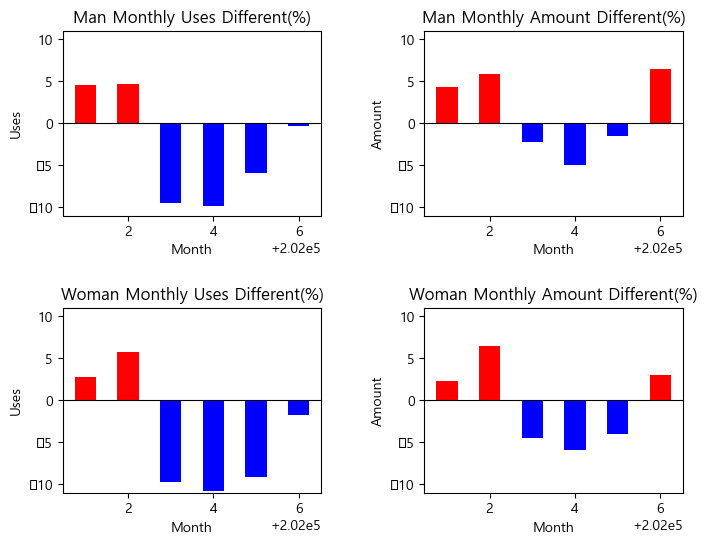

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), gridspec_kw={'wspace': 0.4})

#남성
axes[0, 0].bar(Man_2020['월별'], Man_2020['이용건수 증감(%)'], color=['blue' if value < 0 else 'red' for value in Man_2020['이용건수 증감(%)']], width=0.5)
axes[0, 0].set_title('Man Monthly Uses Different(%)')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Uses')
axes[0, 0].axhline(0, color='black', linewidth=0.8)
axes[0, 0].set_ylim(-11, 11)

axes[0, 1].bar(Man_2020['월별'], Man_2020['이용금액 증감(%)'], color=['blue' if value < 0 else 'red' for value in Man_2020['이용금액 증감(%)']], width=0.5)
axes[0, 1].set_title('Man Monthly Amount Different(%)')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Amount')
axes[0, 1].axhline(0, color='black', linewidth=0.8)
axes[0, 1].set_ylim(-11, 11)

#여성
axes[1, 0].bar(Woman_2020['월별'], Woman_2020['이용건수 증감(%)'], color=['blue' if value < 0 else 'red' for value in Woman_2020['이용건수 증감(%)']], width=0.5)
axes[1, 0].set_title('Woman Monthly Uses Different(%)')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Uses')
axes[1, 0].axhline(0, color='black', linewidth=0.8)
axes[1, 0].set_ylim(-11, 11)

axes[1, 1].bar(Woman_2020['월별'], Woman_2020['이용금액 증감(%)'], color=['blue' if value < 0 else 'red' for value in Woman_2020['이용금액 증감(%)']], width=0.5)
axes[1, 1].set_title('Woman Monthly Amount Different(%)')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Amount')
axes[1, 1].axhline(0, color='black', linewidth=0.8)
axes[1, 1].set_ylim(-11, 11)
fig.subplots_adjust(hspace=0.5)
plt.show()

남성과 여성 둘 다 변화의 정도만 차이가 있을 뿐, 이용건수와 이용금액 모두 같은 경향을 보인다.\
남녀 업종별/월별 변화율을 들여다 볼 필요가 있어보인다.

# 남녀 업종별 소비 변화

In [35]:
Industry_2019 = full_2019[['월별','성별', '업종명', '이용금액', '이용건수']].copy()
Industry_2019['월별'] = Industry_2019['월별'].astype(str).str[4:]

Industry_2020 = full_2020[['월별','성별', '업종명', '이용금액', '이용건수']].copy()
Industry_2020['월별'] = Industry_2020['월별'].astype(str).str[4:]

In [36]:
Industry_2019 = Industry_2019.groupby(['월별','성별', '업종명'], as_index=False).sum()
Industry_2020 = Industry_2020.groupby(['월별','성별', '업종명'], as_index=False).sum()

In [37]:
Industry_2020_Man = Industry_2020[Industry_2020['성별']=='남성']
Industry_2020_Man = Industry_2020_Man.drop('성별', axis=1)
Industry_2019_Man = Industry_2019[Industry_2019['성별']=='남성']
Industry_2019_Man = Industry_2019_Man.drop('성별', axis=1)

Industry_2020_Woman = Industry_2020[Industry_2020['성별']=='여성']
Industry_2020_Woman = Industry_2020_Woman.drop('성별', axis=1)
Industry_2019_Woman = Industry_2019[Industry_2019['성별']=='여성']
Industry_2019_Woman = Industry_2019_Woman.drop('성별', axis=1)

In [38]:
Industry_2020_Man.columns = ['월별', '업종명', '20년 이용금액', '20년 이용건수']
Industry_2019_Man.columns = ['월별', '업종명', '19년 이용금액', '19년 이용건수']

Industry_2020_Woman.columns = ['월별', '업종명', '20년 이용금액', '20년 이용건수']
Industry_2019_Woman.columns = ['월별', '업종명', '19년 이용금액', '19년 이용건수']

In [39]:
Industry_Man = pd.merge(Industry_2020_Man, Industry_2019_Man, on=['월별', '업종명'], how='outer')
Industry_Man.fillna(0, inplace=True)

Industry_Woman = pd.merge(Industry_2020_Woman, Industry_2019_Woman, on=['월별', '업종명'], how='outer')
Industry_Woman.fillna(0, inplace=True)

In [40]:
import numpy as np

Industry_Man['이용금액 증감'] = Industry_Man['20년 이용금액'] - Industry_Man['19년 이용금액']
Industry_Man['이용건수 증감'] = Industry_Man['20년 이용건수'] - Industry_Man['19년 이용건수']
Industry_Man['이용금액 증감(%)'] = np.where(Industry_Man['19년 이용금액'] > 0, (Industry_Man['이용금액 증감'] / Industry_Man['19년 이용금액']) * 100, 0)
Industry_Man['이용건수 증감(%)'] = np.where(Industry_Man['19년 이용금액'] > 0, (Industry_Man['이용건수 증감'] / Industry_Man['19년 이용건수']) * 100, 0)

Industry_Woman['이용금액 증감'] = Industry_Woman['20년 이용금액'] - Industry_Woman['19년 이용금액']
Industry_Woman['이용건수 증감'] = Industry_Woman['20년 이용건수'] - Industry_Woman['19년 이용건수']
Industry_Woman['이용금액 증감(%)'] = np.where(Industry_Woman['19년 이용금액'] > 0, (Industry_Woman['이용금액 증감'] / Industry_Woman['19년 이용금액']) * 100, 0)
Industry_Woman['이용건수 증감(%)'] = np.where(Industry_Woman['19년 이용금액'] > 0, (Industry_Woman['이용건수 증감'] / Industry_Woman['19년 이용건수']) * 100, 0)

In [41]:
Industry_Man.head()

,월별,업종명,20년 이용금액,20년 이용건수,19년 이용금액,19년 이용건수,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
0,01,2급호텔,3.563373e+06,19.0,3.663170e+06,16.0,-9.979700e+04,3.0,-2.724334,18.750000
1,01,DVD음반테이프판매,3.506080e+07,536.0,3.322566e+07,574.0,1.835140e+06,-38.0,5.523261,-6.620209
2,01,PG상품권,1.071668e+10,72313.0,7.941079e+09,40648.0,2.775597e+09,31665.0,34.952389,77.900512
3,01,가례서비스,1.525758e+09,22969.0,7.371822e+08,4406.0,7.885758e+08,18563.0,106.971622,421.311847
4,01,가방,3.574261e+08,1145.0,9.827695e+07,843.0,2.591491e+08,302.0,263.692666,35.824437


In [42]:
Industry_Woman.head()

,월별,업종명,20년 이용금액,20년 이용건수,19년 이용금액,19년 이용건수,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
0,01,2급호텔,2.968500e+06,14.0,1.254000e+06,10.0,1.714500e+06,4.0,136.722488,40.000000
1,01,DVD음반테이프판매,2.113940e+07,327.0,3.689310e+07,578.0,-1.575370e+07,-251.0,-42.700939,-43.425606
2,01,PG상품권,5.729922e+09,51313.0,5.205636e+09,36021.0,5.242867e+08,15292.0,10.071521,42.453014
3,01,가례서비스,1.858815e+09,37011.0,5.542389e+08,4876.0,1.304576e+09,32135.0,235.381518,659.044299
4,01,가방,3.695948e+08,2052.0,2.046956e+08,2245.0,1.648992e+08,-193.0,80.558209,-8.596882


In [43]:
df1 = Industry_Man[['업종명', '19년 이용금액', '19년 이용건수', '이용금액 증감', '이용건수 증감']].copy()
df1 = df1.groupby('업종명', as_index = False).sum()
df1['이용금액 증감(%)'] = np.where(df1['19년 이용금액'] > 0, (df1['이용금액 증감'] / df1['19년 이용금액']) * 100, 0)
df1['이용건수 증감(%)'] = np.where(df1['19년 이용금액'] > 0, (df1['이용건수 증감'] / df1['19년 이용건수']) * 100, 0)
df1 = df1.drop(['19년 이용금액', '19년 이용건수'], axis=1)
df1 = df1.sort_values('이용금액 증감(%)', ascending=False)

df2 = Industry_Woman[['업종명', '19년 이용금액', '19년 이용건수', '이용금액 증감', '이용건수 증감']].copy()
df2 = df2.groupby('업종명', as_index = False).sum()
df2['이용금액 증감(%)'] = np.where(df2['19년 이용금액'] > 0, (df2['이용금액 증감'] / df2['19년 이용금액']) * 100, 0)
df2['이용건수 증감(%)'] = np.where(df2['19년 이용금액'] > 0, (df2['이용건수 증감'] / df2['19년 이용건수']) * 100, 0)
df2 = df2.drop(['19년 이용금액', '19년 이용건수'], axis=1)
df2 = df2.sort_values('이용금액 증감(%)', ascending=False)

In [44]:
df1.head()

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
149,정기간행물,3.959900e+07,249.0,1381.681786,1310.526316
154,제약회사,8.759790e+08,388.0,522.928580,412.765957
0,2급호텔,1.057356e+08,30.0,307.357232,22.556391
180,컴퓨터학원,2.374270e+08,318.0,289.045648,131.404959
5,가방,1.024670e+09,-695.0,152.490490,-11.414025


2019년도 상반기 -> 2020년도 상반기 / 남성이 이용하지 않는 업종

In [45]:
Del1 = df1[df1['이용금액 증감(%)'] == -100]['업종명']
Del1

87       산후조리원
54     농축협직영매장
125        유치원
Name: 업종명, dtype: object

In [46]:
df1[df1['업종명'].isin(Del1)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
87,산후조리원,-7140000.0,-5.0,-100.0,-100.0
54,농축협직영매장,-95012210.0,-2502.0,-100.0,-100.0
125,유치원,-4318000.0,-18.0,-100.0,-100.0


2019년도 상반기 -> 2020년도 상반기 / 여성이 이용하지 않는 업종

In [47]:
Del2 = df2[df2['이용금액 증감(%)'] == -100]['업종명']
Del2

124        유치원
54     농축협직영매장
Name: 업종명, dtype: object

In [48]:
df2[df2['업종명'].isin(Del2)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
124,유치원,-5112500.0,-16.0,-100.0,-100.0
54,농축협직영매장,-129216970.0,-3523.0,-100.0,-100.0


여성과 남성 모두 2020년 들어서 사용하지 않은 업종 : 유치원 / 농축협직영매장

유치원의 경우 COVID-19 여파로 인해 아이를 유치원에 보내지 않는 기조임을 확인할 수 있다.\
특히 농축협직영매장의 경우 매월 평균 1000건에 이르는 거래가 COVID-19 여파로 인해 영업이 아예 불가능한 상태가 확인된다.

In [49]:
Low1 = set(df1[(df1['이용금액 증감(%)'] < -50) & (df1['이용금액 증감(%)'] != -100)]['업종명'])
Low2 = set(df2[(df2['이용금액 증감(%)'] < -50) & (df2['이용금액 증감(%)'] != -100)]['업종명'])

In [50]:
print(Low1 & Low2)

{'수영장', '면세점', '부동산분양', '고속버스', '유학원', '기념품점', '항공사', '건강식품(회원제형태)', '기타자동차서비스', '문화취미기타', '이용원', '부동산중개임대', '성인용품점', '공공요금', '렌트카', '관광여행', '영화관'}


이용이 사라진 업종 제외, 50% 이상으로 이용금액이 크게 감소한 업종의 경우 여행과 취미 등 외부활동에 필요한 업종들의 매출이 크게 감소했다.\
역시 COVID-19의 영향으로 인해 감소된 것으로 판단된다.

남성만 이용금액이 50%이상 감소된 업종(아래)

In [51]:
df1[df1['업종명'].isin(Low1 - Low2)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
37,기타용역서비스,-93798784.0,-2712.0,-52.538434,-55.963681


여성만 이용금액이 50%이상 감소된 업종(아래)

In [52]:
df2[df2['업종명'].isin(Low2 - Low1)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
72,민예공예품,-3.223227e+08,-11122.0,-52.402311,-67.194297
113,양품점,-5.268520e+07,-256.0,-57.503474,-35.704324
62,레져업소(회원제형태),-1.652085e+09,-6810.0,-58.923020,-54.549824
117,와이셔츠타이,-1.495974e+07,-120.0,-62.561900,-46.875000
48,기타회원제형태업소,-6.613598e+09,-143659.0,-62.952246,-83.646198
187,페인트,-3.195854e+07,-278.0,-63.441879,-48.771930
127,윤활유전문판매,-3.322000e+04,0.0,-69.425287,0.000000
50,냉열기기,-5.370960e+06,-8.0,-70.671828,-38.095238
137,인테리어,-4.041392e+07,-546.0,-71.515607,-58.836207
1,DVD음반테이프판매,-2.498022e+08,-2321.0,-78.267292,-64.705882


In [53]:
High1 = set(df1[(df1['이용금액 증감(%)'] > 10) & (df1['이용건수 증감(%)'] > 10)]['업종명'])
High2 = set(df2[(df2['이용금액 증감(%)'] > 10) & (df2['이용건수 증감(%)'] > 10)]['업종명'])

In [54]:
print("남성 :", High1)
print()
print("여성 :", High2)

남성 : {'제약회사', '중장비수리', '농축수산품', '손해보험', '골프경기장', '인터넷PG', '약국', '기타서적문구', '2급호텔', '화물운송', '미곡상', '컴퓨터학원', 'PG상품권', '정수기', '비료농약사료종자', '가례서비스', '주류판매점', '정기간행물', '단체복', '카인테리어', '병원', '수족관', '정육점', '일반백화점'}

여성 : {'제약회사', '농축수산품', '손해보험', '골프경기장', '인터넷PG', '유류판매', '약국', '가전제품', '기타서적문구', '2급호텔', '화물운송', '미곡상', '컴퓨터학원', '가례서비스', '주류판매점', '정기간행물', '단체복', '골동품점', '병원', '정육점', '일반백화점'}


COVID-19에도 불구하고 이용금액과 이용건수가 10%이상 크게 증가한 업종들이 존재한다.

In [55]:
print(High1 & High2)

{'약국', '제약회사', '기타서적문구', '가례서비스', '2급호텔', '병원', '일반백화점', '정육점', '화물운송', '주류판매점', '정기간행물', '농축수산품', '손해보험', '미곡상', '골프경기장', '단체복', '인터넷PG', '컴퓨터학원'}


병원, 손해보험, 제약회사, 약국, 인터넷PG, 정기간행물 등의 업종의 이용이 COVID-19의 영향으로 증가했다고 판단된다.

In [56]:
High_List_1 = set(['병원', '손해보험', '제약회사', '약국', '인터넷PG', '정기간행물'])

남성

In [57]:
df1[df1['업종명'].isin(High_List_1)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
149,정기간행물,3.959900e+07,249.0,1381.681786,1310.526316
154,제약회사,8.759790e+08,388.0,522.928580,412.765957
74,병원,7.226531e+08,5200.0,46.628983,61.801759
136,인터넷PG,5.525329e+11,17741766.0,20.378023,30.786315
96,손해보험,5.676579e+10,620821.0,13.148656,25.012742
113,약국,8.091223e+09,802425.0,12.534346,26.659054


여성

In [58]:
df2[df2['업종명'].isin(High_List_1)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
148,정기간행물,1.072250e+07,133.0,407.699620,458.620690
153,제약회사,1.449470e+08,154.0,290.084301,531.034483
74,병원,9.752507e+08,6664.0,53.736627,48.454883
135,인터넷PG,5.812372e+11,20799080.0,17.355988,30.184230
95,손해보험,4.375809e+10,717280.0,16.233305,29.428840
112,약국,7.530405e+09,665084.0,12.342788,18.995111


증감% 로 확인한 결과 정기간행물과 제약회사가 크게 증가했다.\
그러나 건수와 금액으로 확인한 결과, 남녀 모두 인터넷결제, 손해보험, 약국의 이용이 매우 크게 증가한 것을 확인했다.

골프경기장, 컴퓨터학원, 일반백화점, 주류판매점, 2급호텔 등 외부활동으로 인한 업종의 이용 역시 증가했다.

In [59]:
High_List_2 = set(['골프경기장', '컴퓨터학원', '일반백화점', '주류판매점', '2급호텔'])

남성

In [60]:
df1[df1['업종명'].isin(High_List_2)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
0,2급호텔,1.057356e+08,30.0,307.357232,22.556391
180,컴퓨터학원,2.374270e+08,318.0,289.045648,131.404959
13,골프경기장,8.602831e+07,558.0,145.689262,180.582524
160,주류판매점,8.409028e+07,1192.0,97.834629,189.808917
140,일반백화점,3.508534e+10,216417.0,80.429745,35.005621


여성

In [61]:
df2[df2['업종명'].isin(High_List_2)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
13,골프경기장,6.246499e+07,276.0,329.771482,405.882353
179,컴퓨터학원,2.738999e+08,466.0,252.797241,144.720497
0,2급호텔,3.818836e+07,21.0,202.524344,36.842105
159,주류판매점,4.434049e+07,714.0,126.796522,150.000000
139,일반백화점,4.380197e+10,376387.0,72.627099,34.993571


남녀 모두 골프경기장과 주류판매점의 이용이 크게 늘었으며, 특히 일반백화점의 이용이 매우 크게 늘었다.

남성만 이용이 10%이상 증가된 업종(아래)

In [62]:
df1[df1['업종명'].isin(High1 - High2)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
168,중장비수리,6.673458e+06,12.0,96.882466,120.000000
176,카인테리어,2.339899e+07,77.0,61.125090,17.948718
3,PG상품권,2.055029e+10,181900.0,44.996678,73.933773
99,수족관,1.660807e+07,420.0,22.574036,23.917995
150,정수기,5.569662e+06,35.0,16.691620,18.421053
81,비료농약사료종자,4.812600e+06,250.0,12.873112,17.301038


특히 PG상품권의 이용이 크게 증가했다.\
외부활동에 제약이 생기니 인터넷결제의 이용이 매우 크게 증가한 것을 볼 수 있다.

여성만 이용이 10%이상 증가된 업종(아래)

In [63]:
df2[df2['업종명'].isin(High2 - High1)]

,업종명,이용금액 증감,이용건수 증감,이용금액 증감(%),이용건수 증감(%)
12,골동품점,8.411000e+06,8.0,73.458515,36.363636
121,유류판매,4.843600e+06,22.0,20.866074,10.837438
6,가전제품,3.748620e+09,174330.0,11.831514,39.389667


여성의 경우는 가전제품 업종의 이용이 크게 늘었다.\
외부활동에 사용하던 소비가 줄고 그 줄어든 소비가 집 안을 꾸미고 바꾸는 가전제품업종의 이용으로 이어졌다고 판단할 수 있다.

# 결론

50% 이상 감소하지 않았더라도 COVID-19 여파로 매출 및 소비빈도의 감소가 크게 줄어든 업종은 굉장히 많다.

남성의 소비처 중 15% 이상 소비빈도가 줄어든 업종

In [69]:
df1[df1['이용건수 증감(%)'] < -15]['업종명'].unique()

array(['윤활유전문판매', '유리', '종합용역', '칵테일바', '기타건강식', '통신기기', '컴퓨터', '기타업종',
       '사무기기', '기타광학품', '구내매점', '슈퍼마켓', '스넥', '당구장', '홈쇼핑', '독서실', '제화점',
       '택시', '기타의류', '기타주방용구', '주유소', '냉열기기', '유아원', '기타가구', '일식회집',
       '기타대인서비스', '화방표구점', '기타유통업', '정장', '복지매점', '기타잡화', '시계', '주점',
       '악세사리', '예체능학원', '신변잡화수리', '사진관', '서적출판(회원제형태)', '일반서적', '악기점',
       '카메라', '골프연습장', '견인서비스', '화랑', '귀금속', '기타교육', '초중고교육기관', '화장품',
       '사무서비스', '소프트웨어', '단란주점', '완구점', '미용재료', '대형할인점', '세차장', '출판인쇄물',
       '전문서적', '노래방', '스포츠의류', 'DVD음반테이프판매', '페인트', '학원(회원제형태)', '위탁급식업',
       '기타숙박업', '옷감직물', '맞춤복점', '사우나', '아동의류', '가정용품수리', '특급호텔', '인테리어',
       '치과병원', '사무통신기기수리', '피아노대리점', '와이셔츠타이', '양품점', '레져업소(회원제형태)',
       '민예공예품', '기타회원제형태업소', '유흥주점', '문화취미기타', '기타용역서비스', '기념품점',
       '기타자동차서비스', '유학원', '항공사', '이용원', '수영장', '건강식품(회원제형태)', '부동산중개임대',
       '영화관', '관광여행', '면세점', '렌트카', '성인용품점', '부동산분양', '공공요금', '고속버스',
       '산후조리원', '농축협직영매장', '유치원'], dtype=object)

여성의 소비처 중 15% 이상 소비빈도가 줄어든 업종

In [70]:
df2[df2['이용건수 증감(%)'] < -15]['업종명'].unique()

array(['유리', '가방', '피아노대리점', '애완동물', '기타건강식', '유아원', '컴퓨터', '세차장', '골프용품',
       '기타음료식품', '홈쇼핑', '기타대인서비스', '종합용역', '화랑', '주방용식기', '칵테일바', '상품권',
       '카페트커텐천막', '홍삼제품', '기타업종', '통신기기', '편의점', '슈퍼마켓', '보습학원', '제과점',
       '신변잡화수리', '구내매점', '견인서비스', '외국어학원', '주유소', '당구장', '택시', '침구수예점',
       '스넥', '안경', '서적출판(회원제형태)', '사진관', '단란주점', '소프트웨어', '일반한식', '일반서적',
       '스포츠레져용품', '기타유통업', '주점', '내의판매점', '일식회집', '신발', '기타사무용', '출판인쇄물',
       '귀금속', '독서실', '기타레져업', '예체능학원', '정장', '악세사리', '기타잡화', '치과병원',
       '기타교육', '화방표구점', '기타가구', '노래방', '미용재료', '악기점', '맞춤복점', '시계', '완구점',
       '사무서비스', '기타용역서비스', '기타의류', '아동의류', '티켓', '안마스포츠마사지', '화장품',
       '가정용품수리', '보일러펌프', '초중고교육기관', '카메라', '대형할인점', '기타숙박업', '학원(회원제형태)',
       '복지매점', '특급호텔', '옷감직물', '사무통신기기수리', '사우나', '전문서적', '스포츠의류', '철제가구',
       '유흥주점', '위탁급식업', '기타광학품', '사무기기', '제화점', '민예공예품', '부동산중개임대', '양품점',
       '기념품점', '문화취미기타', '수영장', '레져업소(회원제형태)', '항공사', '와이셔츠타이',
       '기타회원제형태업소', '페인트', '이용원', '냉열기기', '인테리어', '기타자동차서비스

대신 인터넷 쿠폰 및 인터넷 쇼핑의 빈도가 크게 늘어난 만큼,\
줄어든 업종 중 인터넷 스토어로 돌릴 수 있는 업종은 배달을 통한 접촉이 없는 비대면 서비스를 이용하는 것이 도움이 될 것이다.

서적, 주점, 음료, 의류, 마켓, 매점, 식당 등의 업종은 인터넷 쇼핑 및 배달 서비스 신설\
레저, 관광, 취미, 당구 등의 업종은 해당 카테고리를 접목시킨 온라인 VR/게임 등의 서비스로 신규 고객을 유치할 수 있을 것이다.

그 외에도 온라인 서비스를 접목해서 공급할 수 있는 업종의 경우는 COVID-19 사태가 종료된 후에도\
자리잡은 온라인 시장은 계속 성장할 것이므로 신규 서비스를 신설하여 공급해야 한다.